<a href="https://colab.research.google.com/github/rohitrokz29/Assessli_Assignment/blob/main/biomass_to_jet_fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Syngas and chain growth probability

In [1]:
import numpy as np
import pandas as pd


In [2]:
biomass_result=pd.read_csv("https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet=biomass-syngas-variation")
biomass_result

,biomass,H2(kmol/hr),CO(kmol/hr),alpha
0,Wood Residue,250.148750,118.318252,0.885797
1,Pine Sawdust,258.079259,116.751632,0.789502
2,Food Wastes,261.727628,94.163659,0.220503


# Biomass vs   H2,CO Flow Rate



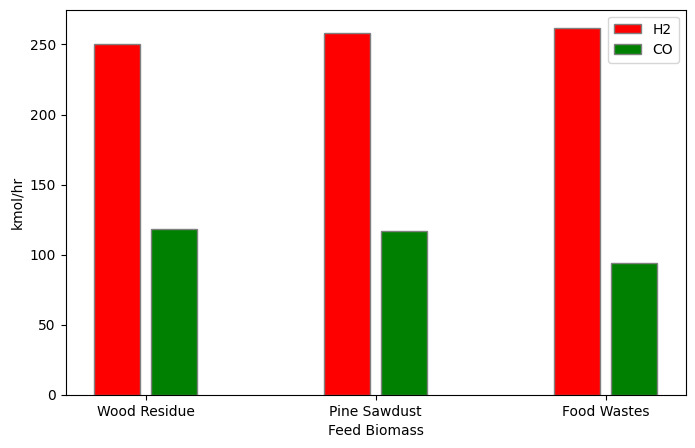

In [3]:
import matplotlib.pyplot as plt

biomass_names=[]
H2=[]
CO=[]
for i in range(len(biomass_result)):
  biomass_names.append(biomass_result['biomass'].iloc[i])
  H2.append(biomass_result['H2(kmol/hr)'].iloc[i])
  CO.append(biomass_result['CO(kmol/hr)'].iloc[i])



br1 = np.arange(len(biomass_names))
br2 = [x + 0.25 for x in br1]
fig=plt.figure(figsize=(8, 5))
plt.bar(br1, H2, color ='r', width = 0.2,
        edgecolor ='grey', label ='H2')
plt.bar(br2, CO, color ='g', width = 0.2,
        edgecolor ='grey', label ='CO')
plt.xlabel('Feed Biomass')
plt.ylabel('kmol/hr')
plt.xticks([r + 0.125 for r in range(len(biomass_names))], biomass_names)
plt.legend()

plt.show()

# Biomass vs Hydrocarnon range plotting


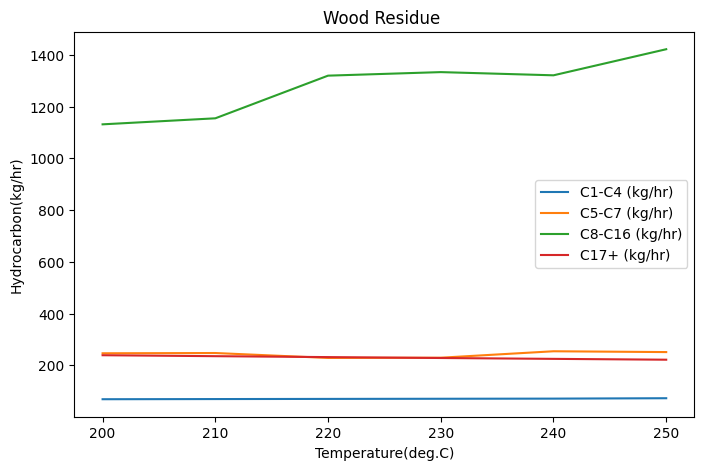

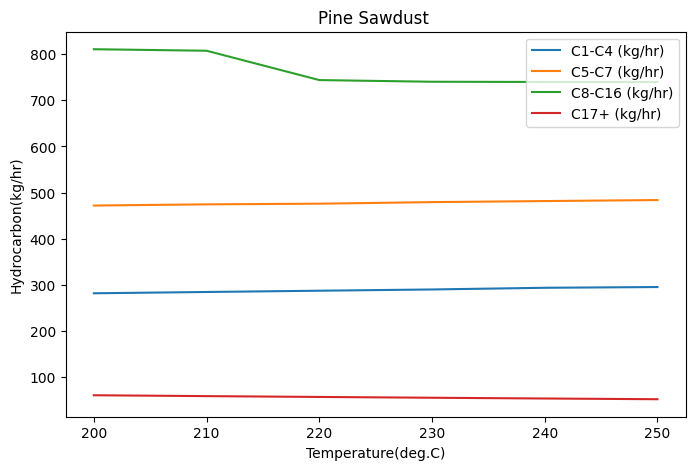

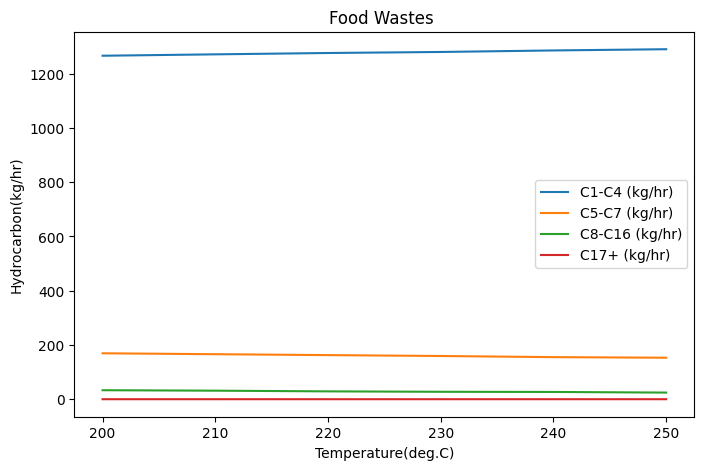

In [4]:
sheet_names=["wood_residue-vs-temp","pine-vs-temp","food-vs-temp"]
alpha_variation_fuel = pd.DataFrame(columns=['Jet Fuel Fraction',"Temperature(deg.C)","Chain Growth Probability"])
alpha_series=[]
def plot_biomass_vs_temp(index):
  biomass_vs_temp=pd.read_csv(f"https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet={sheet_names[index]}")
  # Remove commas and convert all values to numeric where applicable
  biomass_vs_temp = biomass_vs_temp.map(
      lambda x: pd.to_numeric(str(x).replace(',', ''), errors='coerce')
  )
  temp=biomass_vs_temp['Temp(deg.C)']
  a=3-biomass_result['H2(kmol/hr)'].iloc[index]/biomass_result['CO(kmol/hr)'].iloc[index] #chain growth probability
  alpha_series.append(a)
  add_data_to_alpha_variation_fuel(biomass_vs_temp['Jet Mass Fraction'],temp,a)
  current_fig=plt.figure(figsize=(8, 5))
  plt.plot(temp,biomass_vs_temp['C1-C4 (kg/hr)'],label='C1-C4 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C5-C7 (kg/hr)'],label='C5-C7 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C8-C16 (kg/hr)'],label='C8-C16 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C17+ (kg/hr)'],label='C17+ (kg/hr)')
  # plt.plot(temp,biomass_vs_temp['Fuel (kg/hr)'],label='Fuel (kg/hr)')
  plt.xlabel('Temperature(deg.C)')
  plt.ylabel('Hydrocarbon(kg/hr)')
  plt.title(f"{biomass_names[index]} ")
  plt.legend()
  plt.show()

def add_data_to_alpha_variation_fuel(jet_fuel,temp,a):
  global alpha_variation_fuel
  for i in range(len(jet_fuel)):
    new_row = pd.DataFrame([{"Jet Fuel Fraction":f"{jet_fuel[i]}", "Temperature(deg.C)":f"{temp[i]}","Chain Growth Probability":f"{a}" }])
    alpha_variation_fuel = pd.concat([alpha_variation_fuel, new_row], ignore_index=True)

for index in range(len(sheet_names)):
  plot_biomass_vs_temp(index)




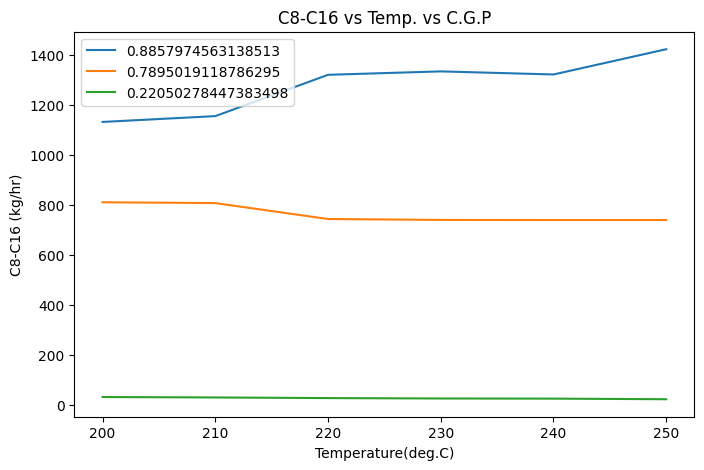

In [5]:
fig_alpha_variation=plt.figure(figsize=(8, 5))

def plot_alpha_vs_temp_hc(index):
  biomass_vs_temp=pd.read_csv(f"https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet={sheet_names[index]}")
  biomass_vs_temp = biomass_vs_temp.map(
      lambda x: pd.to_numeric(str(x).replace(',', ''), errors='coerce')
  )
  plt.plot(biomass_vs_temp['Temp(deg.C)'],biomass_vs_temp['C8-C16 (kg/hr)'],label=f'{alpha_series[index]}')

for index in range(0,3):
  plot_alpha_vs_temp_hc(index)
plt.xlabel('Temperature(deg.C)')
plt.ylabel('C8-C16 (kg/hr)')
plt.title("C8-C16 vs Temp. vs C.G.P")
plt.legend()
plt.show()


# **ML Model to predict the jetfuel production based on alpha, temperature**

MSE (Mean Squared Error): 7.576099903709988e-05


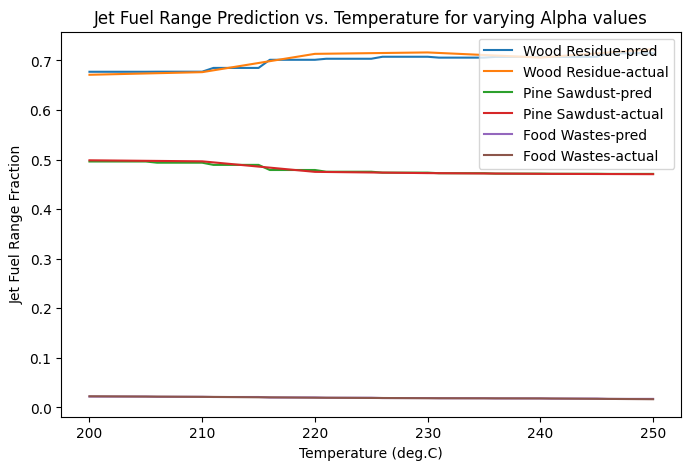

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'alpha_variation_fuel' is your DataFrame with the appropriate data
# alpha_variation_fuel = pd.DataFrame(columns=['Jet Fuel(Kg/hr)',"Temperature(deg.C)","Chain Growth Probability"])

# Data Preprocessing
parameters_x = alpha_variation_fuel[["Temperature(deg.C)", "Chain Growth Probability"]]  # Features
product_y = alpha_variation_fuel['Jet Fuel Fraction']  # Target variable

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(parameters_x, product_y, test_size=0.01, random_state=10)

# Define and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators: number of trees in the forest
rf_model.fit(x_train, y_train)

# Predictions
y_pred = rf_model.predict(x_test)
# Evaluation Metrics
print("MSE (Mean Squared Error):", mean_squared_error(y_test, y_pred))


# Define the chain growth probabilities (alpha) you want to predict for
fig_alpha_variation_hc=plt.figure(figsize=(8, 5))

# Define testing temperatures from 200 to 250
testing_temperatures = [temp for temp in range(200, 251)]


# Assuming rf_model is already trained as per previous code
# Loop over the alpha values and generate predictions
for index in range(0,3):
    biomass_vs_temp=pd.read_csv(f"https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet={sheet_names[index]}")
    prediction_parameters = []
    for temp in testing_temperatures:
        prediction_parameters.append([temp, 3-H2[index]/CO[index]])

    # Convert prediction parameters to a DataFrame with the correct column names
    prediction_df = pd.DataFrame(prediction_parameters, columns=["Temperature(deg.C)", "Chain Growth Probability"])

    # Predict the jet fuel values for the current alpha and temperatures
    y_pred = rf_model.predict(prediction_df)

    # Check for NaN or unusual predictions
    if any(np.isnan(y_pred)):
        print(f"Warning: NaN detected for H2={H2[index]}")


    # Plot the predictions
    plt.plot(testing_temperatures, y_pred, label=f'{biomass_names[index]}-pred')
    plt.plot(biomass_vs_temp['Temp(deg.C)'],biomass_vs_temp['Jet Mass Fraction'],label=f'{biomass_names[index]}-actual')

# Add labels and legend to the plot
plt.xlabel('Temperature (deg.C)')
plt.ylabel('Jet Fuel Range Fraction')
plt.legend()
plt.title('Jet Fuel Range Prediction vs. Temperature for varying Alpha values')

# Adjusting the y-axis limits for better visibility
# plt.ylim(min(min(predictions_dict[alpha]) for alpha in alpha_to_be_predicted) - 10,
        #  max(max(predictions_dict[alpha]) for alpha in alpha_to_be_predicted) + 10)

# Show the plot
plt.show()

# Now, the predictions_dict contains the predictions for each alpha

